### Project Data Analysis

1\. install all packages and import

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import numpy as np
import statistics
import random
import numpy.linalg
%matplotlib inline

2\. The network we use is the item-item graph generated by 'preprocessor.py'

In [2]:
item_item_data = pd.read_table('amazon-meta_item_item_graph.txt' , sep = ' ', names = ['fromNode','toNode', 'weight'])

3\. Node numbers

In [3]:
print(len(item_item_data))

29037


4\. Network Construction

In [4]:
fromnode = item_item_data['fromNode'].tolist()
tonode = item_item_data['toNode'].tolist()
nodeID = list(set(fromnode + tonode))

In [5]:
NetworkA = nx.Graph()
NetworkA.add_nodes_from(nodeID)
EdgeA = [tuple(x) for x in item_item_data.values]

Take a look at Edge at the graph. It is composed of node IDs and weights together with directions.

In [6]:
EdgeA[2:5]

[('0553374966', '0877733759', 1),
 ('0553374966', '067946316X', 1),
 ('0553374966', '0151005745', 1)]

In [7]:
NetworkA.add_weighted_edges_from(EdgeA)

5\. This weighted directed network is not a connected graph. Thus we could analyze the GCC for more information.

In [8]:
print(nx.is_connected(NetworkA))

False


In [9]:
print(nx.number_connected_components(NetworkA))

23


In [10]:
print(nx.number_of_edges(NetworkA))

29037


In [11]:
print(nx.number_of_nodes(NetworkA))

555


In [12]:
GCC = max(nx.connected_component_subgraphs(NetworkA), key = len)

In [13]:
print(GCC.size())
print(nx.number_of_nodes(GCC))
print(nx.number_of_edges(GCC))

29006
506
29006


In [14]:
print(nx.diameter(GCC))

6


In [15]:
triangles_GCC = nx.triangles(GCC)
total_number = sum(triangles_GCC.values())/3
print(total_number)

1623882.0


In [16]:
nx.average_clustering(GCC)

0.8133939199293073

In [17]:
nx.average_shortest_path_length(GCC)

2.04611591593942

6\. Properties for the network are shown above. With a small diameter and high clustering coefficient, the GCC could be a highly-connected network.

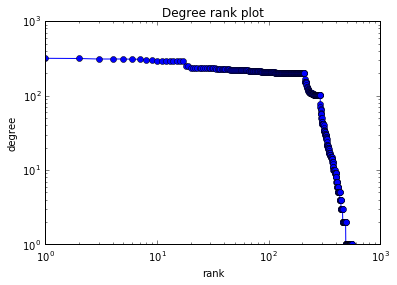

In [22]:
degree_sequence=sorted(nx.degree(NetworkA).values(),reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")
plt.show()

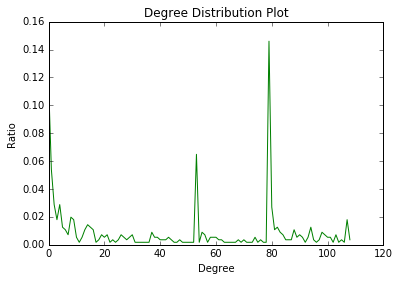

In [23]:
degree_networkA = nx.degree(NetworkA)
degree_distri = {}
for k in degree_networkA.values():
    if not k in degree_distri:
        degree_distri[k] = 1/len(nodeID)
    else:
        degree_distri[k] = 1/len(nodeID) + degree_distri[k]
degree_distri_keys = sorted(degree_distri, key = degree_distri.get)
plt.plot(list(degree_distri.values()), color='green')
plt.title("Degree Distribution Plot")
plt.xlabel("Degree")
plt.ylabel("Ratio")
plt.savefig('project.png')
plt.show()

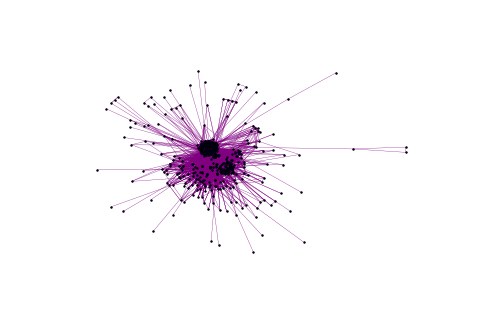

In [24]:
nx.draw(GCC, edge_color='purple', node_color = 'blue', node_size = 2, width = 0.3)
plt.savefig('project2.png', dpi = 600)
plt.show()

The three plots shown above have been well analyzed in our final paper together with other related information.